In [1]:
pip install --upgrade streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show streamlit

Name: streamlit
Version: 1.34.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: c:\Users\ADMIN\New folder\.venv\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: streamlit-option-menu
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import uuid
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier

In [5]:
df = pd.read_csv("C:\\Users\\ADMIN\\New folder\\Copper_Set.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2937362829.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\ADMIN\\New folder\\Copper_Set.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [9]:
uuids = [uuid.uuid4() for _ in range(df['id'].isnull().sum())]
# Assign UUIDs to null IDs
df.loc[df['id'].isnull(), 'id'] = uuids


In [10]:
# Define a function to convert the float date to a proper date format
def convert_to_date(date_float):
    # Check if the value is NaN
    if pd.isna(date_float):
        return None
    else:
        date_str = str(int(float(date_float)))
        if len(date_str) == 8:
            try:
                # Parse string into datetime object
                return pd.to_datetime(date_str, format='%Y%m%d')
            except ValueError:
                # Return None for invalid date values
                return None
        else:
            # Return None for invalid date values
            return None

# Apply the conversion function to the 'delivery date' column
df['item_date'] = df['item_date'].apply(convert_to_date)


In [11]:
default_date = df['item_date'].min()  # or max() for the latest date
df['item_date'].fillna(default_date, inplace=True)

# Convert datetime objects to numerical representation (day count from a reference date)
df['numerical_item_date'] = (df['item_date'] - df['item_date'].min()).dt.days

# Reshape numerical representation to be a 2D array (required by MinMaxScaler)
numerical_dates = df['numerical_item_date'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
df['item_date'] = scaler.fit_transform(numerical_dates)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2329484640.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_date'].fillna(default_date, inplace=True)


In [12]:
df['item_date']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
181668    0.0
181669    0.0
181670    0.0
181671    0.0
181672    0.0
Name: item_date, Length: 181673, dtype: float64

In [13]:
customer_med = df['customer'].median()
df['customer'].fillna(customer_med, inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2196608730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer'].fillna(customer_med, inplace = True)


In [14]:
# Instantiate the SimpleImputer with a strategy (e.g., most frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the column 'country' (assuming it's numeric)
imputer.fit(df[['country']])

# Transform the 'country' column, replacing NaN values with the most frequent value
df['country'] = imputer.transform(df[['country']])

In [15]:
mode_status = df['status'].mode()[0]
df['status'].fillna(mode_status, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\1796957982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['status'].fillna(mode_status, inplace=True)


In [16]:
mode_application = df['application'].mode()[0]
df['application'].fillna(mode_application, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\1018583538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['application'].fillna(mode_application, inplace=True)


In [17]:
mode_thickness = df['thickness'].mode()[0]
df['thickness'].fillna(mode_thickness, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2386983243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thickness'].fillna(mode_thickness, inplace=True)


In [18]:
mask = df['material_ref'].str.startswith('00000').fillna(False)

# Replace the values that match the condition with None
df.loc[mask, 'material_ref'] = None

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\3058941121.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask = df['material_ref'].str.startswith('00000').fillna(False)


In [19]:
default_code = 'UNKNOWN'
df['material_ref'].fillna(default_code, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2137194422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['material_ref'].fillna(default_code, inplace=True)


In [20]:
# Define a function to convert the float date to a proper date format
def convert_to_date(date_float):
    # Check if the value is NaN
    if pd.isna(date_float):
        return None
    else:
        date_str = str(int(float(date_float)))
        if len(date_str) == 8:
            try:
                # Parse string into datetime object
                return pd.to_datetime(date_str, format='%Y%m%d')
            except ValueError:
                # Return None for invalid date values
                return None
        else:
            # Return None for invalid date values
            return None

# Apply the conversion function to the 'delivery date' column
df['delivery date'] = df['delivery date'].apply(convert_to_date)

In [21]:
default_date = df['delivery date'].min()  # or max() for the latest date
df['delivery date'].fillna(default_date, inplace=True)

# Convert datetime objects to numerical representation (day count from a reference date)
df['numerical_item_date'] = (df['delivery date'] - df['delivery date'].min()).dt.days

# Reshape numerical representation to be a 2D array (required by MinMaxScaler)
numerical_dates = df['numerical_item_date'].values.reshape(-1, 1)

# Apply Min-Max scaling
scaler = MinMaxScaler()
df['delivery date'] = scaler.fit_transform(numerical_dates)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2668286821.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['delivery date'].fillna(default_date, inplace=True)


In [22]:
df['delivery date']

0         0.817097
1         0.726640
2         0.637177
3         0.637177
4         0.695825
            ...   
181668    0.454274
181669    0.454274
181670    0.454274
181671    0.454274
181672    0.454274
Name: delivery date, Length: 181673, dtype: float64

In [23]:
mean_selling_price = df['selling_price'].mean()
df['selling_price'].fillna(mean_selling_price, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\2544126613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selling_price'].fillna(mean_selling_price, inplace=True)


In [24]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [25]:
df.isnull().sum()

id                     0
item_date              0
quantity tons          1
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
numerical_item_date    0
dtype: int64

In [26]:
quantity = df['quantity tons'].mean()
df['quantity tons'].fillna(quantity, inplace= True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9972\1458799482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(quantity, inplace= True)


In [27]:
df.isnull().sum()

id                     0
item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref           0
product_ref            0
delivery date          0
selling_price          0
numerical_item_date    0
dtype: int64

In [28]:
def quantity_tons_plot():
    # Plot boxplot with outliers
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.boxplot(df['quantity tons'])
    plt.title('Boxplot of Quantity Tons with Outliers')
    plt.ylabel('Quantity (Tons)')
    plt.show()
    # Assuming df is your DataFrame with the column 'quantity tons'
    plt.hist(df['quantity tons'], bins=20)
    plt.xlabel('quantity tons')
    plt.ylabel('Frequency')
    plt.show()

    # Interquartile Range (IQR) method
    Q1 = df['quantity tons'].quantile(0.25)
    Q3 = df['quantity tons'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df['quantity tons'].median()

    # Replace outliers with the median value
    df['quantity tons'] = df['quantity tons'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    df['quantity tons'] = np.cbrt(df['quantity tons'])

    # Plot boxplot without outliers
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.boxplot(df['quantity tons'])
    plt.title('Boxplot of Quantity Tons without Outliers')
    plt.ylabel('Quantity (Tons)')
    plt.show()

    # Assuming df is your DataFrame with the column 'quantity tons'
    plt.hist(df['quantity tons'], bins=20)
    plt.xlabel('quantity tons')
    plt.ylabel('Frequency')
    plt.show()



In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   181673 non-null  object 
 1   item_date            181673 non-null  float64
 2   quantity tons        181673 non-null  float64
 3   customer             181673 non-null  float64
 4   country              181673 non-null  float64
 5   status               181673 non-null  object 
 6   item type            181673 non-null  object 
 7   application          181673 non-null  float64
 8   thickness            181673 non-null  float64
 9   width                181673 non-null  float64
 10  material_ref         181673 non-null  object 
 11  product_ref          181673 non-null  int64  
 12  delivery date        181673 non-null  float64
 13  selling_price        181673 non-null  float64
 14  numerical_item_date  181673 non-null  int64  
dtypes: float64(9), in

In [30]:
df['quantity tons']

0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671   -2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   181673 non-null  object 
 1   item_date            181673 non-null  float64
 2   quantity tons        181673 non-null  float64
 3   customer             181673 non-null  float64
 4   country              181673 non-null  float64
 5   status               181673 non-null  object 
 6   item type            181673 non-null  object 
 7   application          181673 non-null  float64
 8   thickness            181673 non-null  float64
 9   width                181673 non-null  float64
 10  material_ref         181673 non-null  object 
 11  product_ref          181673 non-null  int64  
 12  delivery date        181673 non-null  float64
 13  selling_price        181673 non-null  float64
 14  numerical_item_date  181673 non-null  int64  
dtypes: float64(9), in

In [32]:
def plot_country():
    # Create a boxplot with outliers
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.boxplot(df['country'], patch_artist=True, showfliers=True)
    plt.title('Boxplot of Country with Outliers')
    plt.xlabel('Country')
    plt.show()

    # Assuming df is your DataFrame with the column 'quantity tons'
    plt.hist(df['country'], bins=20)
    plt.xlabel('country')
    plt.ylabel('Frequency')
    plt.show()

    # Perform Box-Cox transformation
    transformed_data, lambda_value = boxcox(df['country'])

    # Assign the transformed values to a new column in the DataFrame
    df['country'] = transformed_data

    # Create a boxplot with outliers
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    plt.boxplot(df['country'], patch_artist=True, showfliers=True)
    plt.title('Boxplot of Country without Outliers')
    plt.xlabel('Country')
    plt.show()

    # Assuming df is your DataFrame with the column 'quantity tons'
    plt.hist(df['country'], bins=20)
    plt.xlabel('country')
    plt.ylabel('Frequency')
    plt.show()


In [33]:
def plot_customer():
    plt.figure(figsize=(8,6))
    plt.boxplot(df['customer'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of customer with outliers")
    plt.xlabel("Customer")
    plt.show()

    # Assuming df is your DataFrame with the column 'customer'
    plt.hist(df['customer'], bins=20)
    plt.xlabel('customer')
    plt.ylabel('Frequency')
    plt.show()

    def treat_outliers_isolation_forest(data, column):
        # Reshape the data for Isolation Forest
        X = data[column].values.reshape(-1, 1)
        
        # Instantiate IsolationForest
        clf = IsolationForest(contamination=0.1, random_state=42)  # Contamination is the expected proportion of outliers
        
        # Fit the model
        clf.fit(X)
        
        # Predict outliers
        outliers = clf.predict(X)
        
        # Marking outliers and replacing them with NaNs
        data[column] = np.where(outliers == -1, np.nan, data[column])
        
        return data

    df = treat_outliers_isolation_forest(df, 'customer')

    mean_value = df['customer'].mean()
    df['customer'].fillna(mean_value, inplace=True)

    df['customer'] = np.log(df['customer'])

    plt.figure(figsize=(8,6))
    plt.boxplot(df['customer'], patch_artist=True,showfliers=True)
    plt.title("Box plot of customer without outliers")
    plt.xlabel("Customer")
    plt.show()

    # Assuming df is your DataFrame with the column 'customer'
    plt.hist(df['customer'], bins=20)
    plt.xlabel('customer')
    plt.ylabel('Frequency')
    plt.show()



In [34]:
def plot_application():
    plt.figure(figsize=(8,6))
    plt.boxplot(df['application'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of application with outliers")
    plt.xlabel("Application")
    plt.show()

    # Assuming df is your DataFrame with the column 'customer'
    plt.hist(df['application'], bins=20)
    plt.xlabel('Application')
    plt.ylabel('Frequency')
    plt.show()

    df['application'] = np.log(df['application'])

    plt.figure(figsize=(8,6))
    plt.boxplot(df['application'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of application without outliers")
    plt.xlabel("Application")
    plt.show()

    # Assuming df is your DataFrame with the column 'customer'
    plt.hist(df['application'], bins=20)
    plt.xlabel('Application')
    plt.ylabel('Frequency')
    plt.show()

In [35]:
def plot_thickness():
    plt.figure(figsize=(8,6))
    plt.boxplot(df['thickness'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of thickness with outliers")
    plt.xlabel("Thickness")
    plt.show()

    # Assuming df is your DataFrame with the column 'Thickness'
    plt.hist(df['thickness'], bins=20)
    plt.xlabel('Thickness')
    plt.ylabel('Frequency')
    plt.show()

    def treat_outliers_isolation_forest(data, column):
        # Reshape the data for Isolation Forest
        X = data[column].values.reshape(-1, 1)
        
        # Instantiate IsolationForest
        clf = IsolationForest(contamination=0.1, random_state=42)  # Contamination is the expected proportion of outliers
        
        # Fit the model
        clf.fit(X)
        
        # Predict outliers
        outliers = clf.predict(X)
        
        # Marking outliers and replacing them with NaNs
        data[column] = np.where(outliers == -1, np.nan, data[column])
        
        return data

    df = treat_outliers_isolation_forest(df, 'thickness')

    mean_value = df['thickness'].mean()
    df['thickness'].fillna(mean_value, inplace=True)

    df['thickness'] = np.log(df['thickness'])

    plt.figure(figsize=(8,6))
    plt.boxplot(df['thickness'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of thickness without outliers")
    plt.xlabel("Thickness")
    plt.show()

    # Assuming df is your DataFrame with the column 'Thickness'
    plt.hist(df['thickness'], bins=20)
    plt.xlabel('Thickness')
    plt.ylabel('Frequency')
    plt.show()

In [36]:
def plot_width():
    plt.figure(figsize=(8,6))
    plt.boxplot(df['width'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of width with outliers")
    plt.xlabel("width")
    plt.show()

    # Assuming df is your DataFrame with the column 'width'
    plt.hist(df['width'], bins=20)
    plt.xlabel('width')
    plt.ylabel('Frequency')
    plt.show()

    def treat_outliers_isolation_forest(data, column):
        # Reshape the data for Isolation Forest
        X = data[column].values.reshape(-1, 1)
        
        # Instantiate IsolationForest
        clf = IsolationForest(contamination=0.1, random_state=42)  # Contamination is the expected proportion of outliers
        
        # Fit the model
        clf.fit(X)
        
        # Predict outliers
        outliers = clf.predict(X)
        
        # Marking outliers and replacing them with NaNs
        data[column] = np.where(outliers == -1, np.nan, data[column])
        
        return data

    df = treat_outliers_isolation_forest(df, 'width')

    mean_value = df['width'].mean()
    df['width'].fillna(mean_value, inplace=True)

    plt.figure(figsize=(8,6))
    plt.boxplot(df['width'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of width without outliers")
    plt.xlabel("width")
    plt.show()

    # Assuming df is your DataFrame with the column 'width'
    plt.hist(df['width'], bins=20)
    plt.xlabel('width')
    plt.ylabel('Frequency')
    plt.show()

In [37]:
def plot_selling_price():
    plt.figure(figsize=(8,6))
    plt.boxplot(df['selling_price'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of selling_price with outliers")
    plt.xlabel("selling_price")
    plt.show()

    # Assuming df is your DataFrame with the column 'selling_price'
    plt.hist(df['selling_price'], bins=20)
    plt.xlabel('selling_price')
    plt.ylabel('Frequency')
    plt.show()

    def treat_outliers_isolation_forest(data, column):
        # Reshape the data for Isolation Forest
        X = data[column].values.reshape(-1, 1)
        
        # Instantiate IsolationForest
        clf = IsolationForest(contamination=0.1, random_state=42)  # Contamination is the expected proportion of outliers
        
        # Fit the model
        clf.fit(X)
        
        # Predict outliers
        outliers = clf.predict(X)
        
        # Marking outliers and replacing them with NaNs
        data[column] = np.where(outliers == -1, np.nan, data[column])
        
        return data

    df = treat_outliers_isolation_forest(df, 'selling_price')

    mean_value = df['selling_price'].mean()
    df['selling_price'].fillna(mean_value, inplace=True)

    plt.figure(figsize=(8,6))
    plt.boxplot(df['selling_price'], patch_artist=True,showfliers=True)
    plt.title("Boxplot of selling_price without outliers")
    plt.xlabel("selling_price")
    plt.show()

    # Assuming df is your DataFrame with the column 'selling_price'
    plt.hist(df['selling_price'], bins=20)
    plt.xlabel('selling_price')
    plt.ylabel('Frequency')
    plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   181673 non-null  object 
 1   item_date            181673 non-null  float64
 2   quantity tons        181673 non-null  float64
 3   customer             181673 non-null  float64
 4   country              181673 non-null  float64
 5   status               181673 non-null  object 
 6   item type            181673 non-null  object 
 7   application          181673 non-null  float64
 8   thickness            181673 non-null  float64
 9   width                181673 non-null  float64
 10  material_ref         181673 non-null  object 
 11  product_ref          181673 non-null  int64  
 12  delivery date        181673 non-null  float64
 13  selling_price        181673 non-null  float64
 14  numerical_item_date  181673 non-null  int64  
dtypes: float64(9), in

In [39]:
def randomforrestregression(df):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply Label Encoding to 'status', 'material_ref', and 'item_type' columns
    df['status_encoded'] = label_encoder.fit_transform(df['status'])
    df['material_ref_encoded'] = label_encoder.fit_transform(df['material_ref'])
    df['item_type_encoded'] = label_encoder.fit_transform(df['item type'])

    df['product_ref'] = df['product_ref'].astype('category')
    df_encoded = pd.get_dummies(df,columns = ['product_ref'],prefix = 'product')

    df_encoded = df_encoded.drop(columns = ['id','status','item type','numerical_item_date','material_ref'])

    # Split the data into features (X) and target variable (y)
    X = df_encoded.drop('selling_price', axis=1)
    y = df_encoded['selling_price']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model on the training data
    rf_regressor.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    '''st.write("Random Forest Regression Results:")
    st.write("Mean Squared Error:", mse)
    st.write("R^2 Score:", r2)'''

    #st.subheader("Regression Analysis Plot")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Actual Selling Price vs Predicted Selling Price')
    plt.xlim(0,3000)
    plt.ylim(0,3000)
    plt.show()

    results_df = pd.DataFrame({'Actual Selling Price': y_test, 'Predicted Selling Price': y_pred})
    print(results_df)



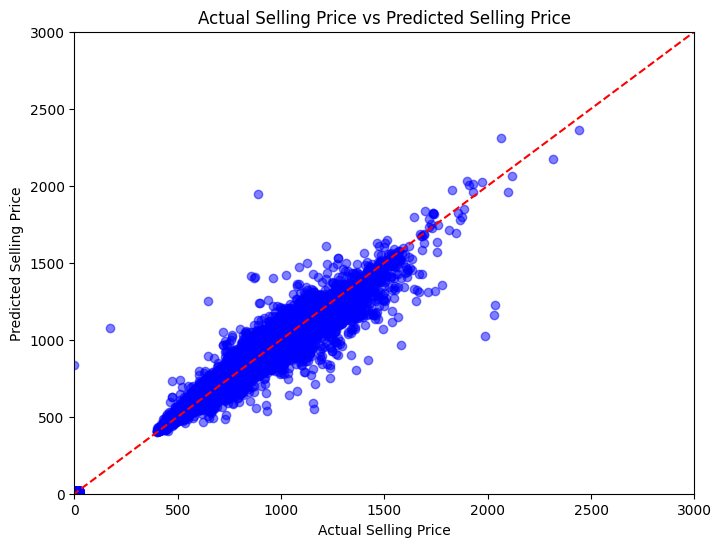

        Actual Selling Price  Predicted Selling Price
46308                1210.00                1202.5500
29893                1201.00                1218.8100
159082                733.00                 707.9700
108098                746.00                 720.1300
2960                 1289.20                1300.4004
...                      ...                      ...
26569                 932.00                 930.3843
156065                496.00                 507.0400
16869                1174.00                1178.5100
78263                1100.00                1100.0030
97567                 816.63                 824.3991

[36335 rows x 2 columns]


In [40]:
randomforrestregression(df)

In [49]:
new_df = df.drop(columns = ['id','item type','material_ref','numerical_item_date','status_encoded'])
df['product_ref'] = df['product_ref'].astype('category')
new_df = pd.get_dummies(new_df,columns = ['product_ref'],prefix = 'product')
# Mapping status values to Success or Failure
new_df['status'] = new_df['status'].map({'Won': 'Success', 'Lost': 'Failure'})

# Dropping rows with status values other than 'Success' or 'Failure'
new_df = new_df[new_df['status'].isin(['Success', 'Failure'])]

# 2. Split data into features (X) and target variable (y)
X = new_df.drop('status', axis=1)
y = new_df['status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# 5. Train the model
rf_classifier.fit(X_train, y_train)

# 6. Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred, target_names=["Success","Failure"])
print(class_report)



Accuracy: 0.9701561980724493
Precision: 0.9700058773326211
Recall: 0.9701561980724493
F1-score: 0.970054324774977
Confusion Matrix:
[[ 6447   516]
 [  382 22745]]
              precision    recall  f1-score   support

     Success       0.94      0.93      0.93      6963
     Failure       0.98      0.98      0.98     23127

    accuracy                           0.97     30090
   macro avg       0.96      0.95      0.96     30090
weighted avg       0.97      0.97      0.97     30090



In [42]:
new_df

,item_date,quantity tons,customer,country,status,application,thickness,width,delivery date,selling_price,...,product_1668701725,product_1670798778,product_1671863738,product_1671876026,product_1690738206,product_1690738219,product_1693867550,product_1693867563,product_1721130331,product_1722207579
0,1.0,54.151139,30156308.0,28.0,Success,10.0,2.00,1500.0,0.817097,854.00,...,False,True,False,False,False,False,False,False,False,False
1,1.0,768.024839,30202938.0,25.0,Success,41.0,0.80,1210.0,0.726640,1047.00,...,False,False,False,False,False,False,False,False,False,False
2,1.0,386.127949,30153963.0,30.0,Success,28.0,0.38,952.0,0.637177,644.33,...,False,False,False,False,False,False,False,False,False,False
3,1.0,202.411065,30349574.0,32.0,Success,59.0,2.30,1317.0,0.637177,768.00,...,False,False,False,False,False,False,False,False,False,False
4,1.0,785.526262,30211560.0,28.0,Success,10.0,4.00,2000.0,0.695825,577.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,0.0,102.482422,30200854.0,25.0,Success,41.0,0.96,1220.0,0.454274,591.00,...,False,False,False,False,False,False,False,False,False,False
181669,0.0,208.086469,30200854.0,25.0,Success,41.0,0.95,1500.0,0.454274,589.00,...,False,False,False,False,False,False,False,False,False,False
181670,0.0,4.235594,30200854.0,25.0,Success,41.0,0.71,1250.0,0.454274,619.00,...,False,False,False,False,False,False,False,False,False,False
181671,0.0,-2000.000000,30200854.0,25.0,Success,41.0,0.85,1250.0,0.454274,601.00,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# 2. Split data into features (X) and target variable (y)
X = new_df.drop('status', axis=1)
y = new_df['status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# 5. Train the model
rf_classifier.fit(X_train, y_train)

# 6. Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9701561980724493


In [44]:
X = new_df.drop('status', axis=1)
y = new_df['status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# 5. Train the model
log_reg_classifier.fit(X_train, y_train)

# 6. Predict on the testing data
y_pred = log_reg_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7685942173479561


In [45]:
X = new_df.drop('status', axis=1)
y = new_df['status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# 5. Train the model
gbm_classifier.fit(X_train, y_train)

# 6. Predict on the testing data
y_pred = gbm_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8443336656696577
Precision: 0.8358860923684651
Recall: 0.8443336656696577
F1-score: 0.8307055509282163
Confusion Matrix:
[[ 3328  3635]
 [ 1049 22078]]


In [46]:
# 2. Split data into features (X) and target variable (y)
X = new_df.drop('status', axis=1)
y = new_df['status']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the AdaBoost Classifier with DecisionTreeClassifier as base estimator
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# 5. Train the model
ada_classifier.fit(X_train, y_train)

# 6. Predict on the testing data
y_pred = ada_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\ADMIN\New folder\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8214689265536723
